In [1]:
# importing dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [75]:
filename = "GOOG.csv"

In [76]:
# storing data in a variable
def read_data(filename):
    df = pd.read_csv(filename)
    df = df.replace(",", "", regex=True)
    return df

In [77]:
df = read_data(filename)
title = filename[:-4]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-17,1514.670044,1525.609985,1507.969971,1517.979980,1517.979980,1378300
1,2020-08-18,1526.180054,1562.469971,1523.709961,1558.599976,1558.599976,2027100
2,2020-08-19,1553.310059,1573.680054,1543.949951,1547.530029,1547.530029,1660600
3,2020-08-20,1543.449951,1585.869995,1538.199951,1581.750000,1581.750000,1706900
4,2020-08-21,1577.030029,1597.719971,1568.005005,1580.420044,1580.420044,1446500


In [78]:
# get the number of trading days
df.shape

(252, 7)

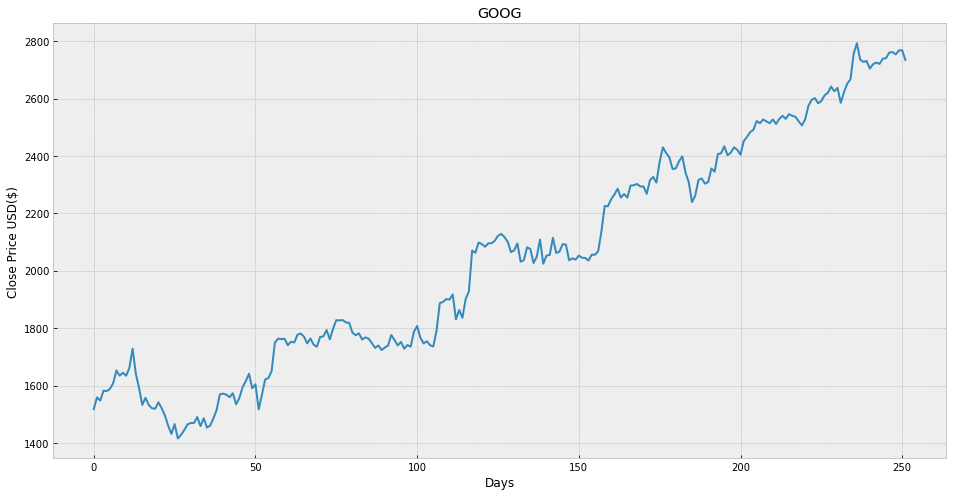

In [79]:
# Visialize the close price data
plt.figure(figsize=(16,8))
plt.title(title)
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.show()

In [80]:
# Get the close price
df = df[['Close']]
df.head()

,Close
0,1517.979980
1,1558.599976
2,1547.530029
3,1581.750000
4,1580.420044


In [81]:
# Create a variable to predict 'x' days out into the future
future_days = 30
# Create a new column (target) shifted 'x' days up
df['Prediction'] = df['Close'].shift(-future_days)
df.tail()

,Close,Prediction
247,2761.929932,NaN
248,2753.790039,NaN
249,2767.790039,NaN
250,2768.120117,NaN
251,2734.260010,NaN


In [82]:
# Create feature data set (X) and convert it to numpy array and remove the last 'x' days rows
X = np.array(df.drop(columns='Prediction'))[:-future_days]
X

array([[1517.97998 ],
       [1558.599976],
       [1547.530029],
       [1581.75    ],
       [1580.420044],
       [1588.199951],
       [1608.219971],
       [1652.380005],
       [1634.329956],
       [1644.410034],
       [1634.180054],
       [1660.709961],
       [1728.280029],
       [1641.839966],
       [1591.040039],
       [1532.390015],
       [1556.959961],
       [1532.02002 ],
       [1520.719971],
       [1519.280029],
       [1541.439941],
       [1520.900024],
       [1495.530029],
       [1459.98999 ],
       [1431.160034],
       [1465.459961],
       [1415.209961],
       [1428.290039],
       [1444.959961],
       [1464.52002 ],
       [1469.329956],
       [1469.599976],
       [1490.089966],
       [1458.420044],
       [1486.02002 ],
       [1453.439941],
       [1460.290039],
       [1485.930054],
       [1515.219971],
       [1569.150024],
       [1571.680054],
       [1568.079956],
       [1559.130005],
       [1573.01001 ],
       [1534.609985],
       [15

In [83]:
# Create the target data set (y) and convert it to numpy array and remove the last 'x' days rows
y = np.array(df['Prediction'])[:-future_days]
y

array([1469.329956, 1469.599976, 1490.089966, 1458.420044, 1486.02002 ,
       1453.439941, 1460.290039, 1485.930054, 1515.219971, 1569.150024,
       1571.680054, 1568.079956, 1559.130005, 1573.01001 , 1534.609985,
       1555.930054, 1593.310059, 1615.329956, 1641.      , 1590.449951,
       1604.26001 , 1516.619995, 1567.23999 , 1621.01001 , 1626.030029,
       1650.209961, 1749.130005, 1763.369995, 1761.75    , 1763.      ,
       1740.390015, 1752.709961, 1749.839966, 1777.02002 , 1781.380005,
       1770.150024, 1746.780029, 1763.920044, 1742.189941, 1734.859985,
       1768.880005, 1771.430054, 1793.189941, 1760.73999 , 1798.099976,
       1827.949951, 1826.77002 , 1827.98999 , 1819.47998 , 1818.550049,
       1784.130005, 1775.329956, 1781.77002 , 1760.060059, 1767.77002 ,
       1763.      , 1747.900024, 1731.01001 , 1739.369995, 1723.5     ,
       1732.380005, 1738.849976, 1776.089966, 1758.719971, 1739.52002 ,
       1751.880005, 1728.23999 , 1740.920044, 1735.290039, 1787.

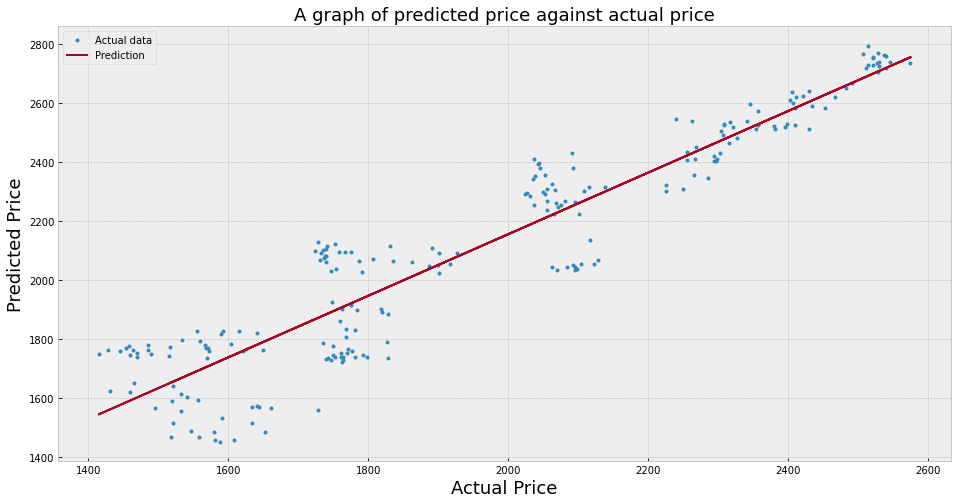

In [84]:
# Visualize the Target price and the actual price (Close Price)
x = X[:,0]
coef = np.polyfit(x, y, 1)
poly = np.poly1d(coef)
predict = poly(x)
plt.figure(figsize=(16,8))
plt.title("A graph of predicted price against actual price", fontsize=18)
plt.xlabel("Actual Price", fontsize=18)
plt.ylabel("Predicted Price", fontsize=18)
plt.plot(x, y, '.')
plt.plot(x, predict)
plt.legend(["Actual data","Prediction"])

In [85]:
# Split data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [86]:
# Create the Decision Tree Regressor Model
tree = DecisionTreeRegressor().fit(X_train, y_train)
# Create the linear Regression model
lr = LinearRegression().fit(X_train, y_train)

In [87]:
# Check accuracy of tree  regression
tree_accuracy = tree.score(X_test, y_test)
# Check accuracy of linear model regression
lr_accuracy = lr.score(X_test, y_test)

print(tree_accuracy)
print()
print(lr_accuracy)

0.7395955329361894

0.8201618404242312


In [88]:
# Get the last 'x' rows of the feature data set
x_future = X[-future_days:]
x_future

array([[2345.100098],
       [2406.669922],
       [2409.070068],
       [2433.530029],
       [2402.51001 ],
       [2411.560059],
       [2429.810059],
       [2421.280029],
       [2404.610107],
       [2451.76001 ],
       [2466.090088],
       [2482.850098],
       [2491.399902],
       [2521.600098],
       [2513.929932],
       [2527.040039],
       [2520.659912],
       [2513.929932],
       [2527.419922],
       [2511.350098],
       [2529.100098],
       [2539.98999 ],
       [2529.22998 ],
       [2545.639893],
       [2539.899902],
       [2536.389893],
       [2520.370117],
       [2506.320068],
       [2527.370117],
       [2574.379883]])

In [89]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# Show the model linear regression
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[2539.98999  2601.550049 2583.540039 2591.48999  2611.280029 2619.889893
 2641.649902 2625.330078 2636.909912 2622.030029 2622.030029 2652.01001
 2652.01001  2756.320068 2792.889893 2735.929932 2727.629883 2792.889893
 2768.120117 2719.790039 2725.600098 2720.570068 2738.800049 2740.719971
 2760.040039 2761.929932 2753.790039 2767.790039 2768.120117 2740.719971]

[2524.93315175 2589.06493879 2591.56495653 2617.04271346 2584.73192997
 2594.15855778 2613.16795293 2604.28298247 2586.91941346 2636.0312566
 2650.95761908 2668.41502471 2677.32059198 2708.77743906 2700.78811214
 2714.44373978 2707.79813127 2700.78811214 2714.83942997 2698.10092946
 2716.58951926 2727.93254721 2716.72480574 2733.81754659 2727.83871059
 2724.18264768 2707.4962777  2692.86159642 2714.78755255 2763.75342749]


<ipython-input-90-99624c6e3de7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


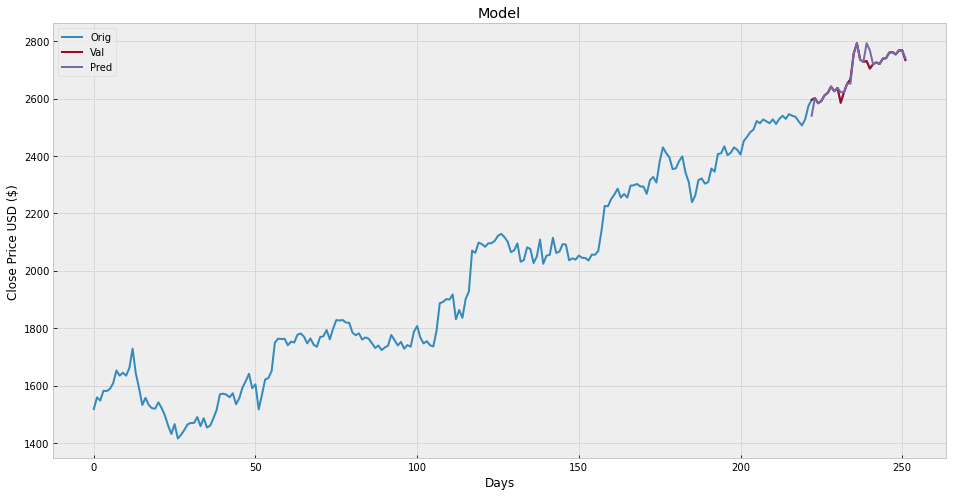

In [90]:
# Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.savefig("GOOG_Stock (DecisionTree)")
plt.show()

<ipython-input-91-28d4ac2f19f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


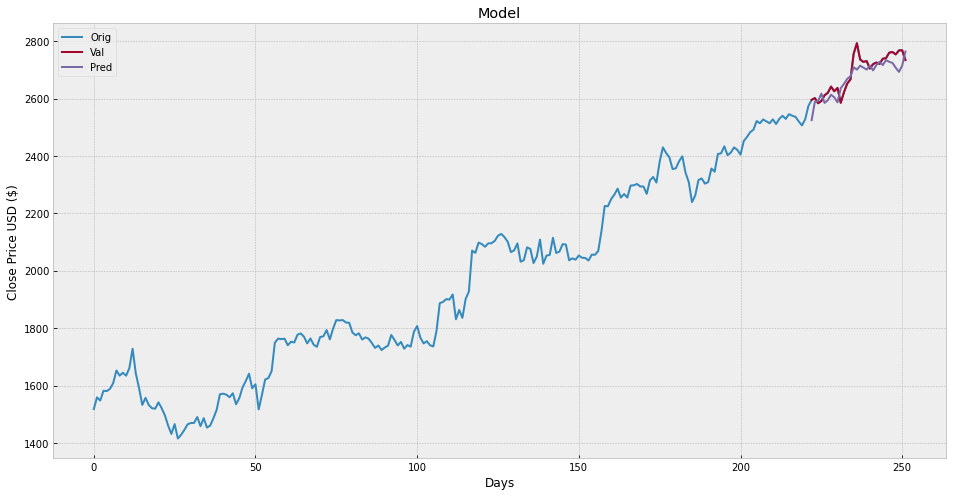

In [91]:
# Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.savefig("GOOG_Stock (LinearModel)")
plt.show()